# Algoritimos evolutivos


In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 



In [8]:


# lendo arquivo
diretorio= ("C:\\Users\\Luiz Fernando\\Desktop\\mecai\\delbem\\")

#di_fonte= 'DI.csv'
ibov= ("IBOVESPA.xlsx")
banco = ("banco_de_dados.xlsx")

ibovespa = pd.read_excel(diretorio+ibov)
banco = pd.read_excel(diretorio+banco)
#di=pd.read_csv(diretorio+di_fonte, sep =';')



In [10]:
#AÇões

#APAGANDO COLUNAS SEM VALORES
banco = banco.dropna(axis='columns' )



In [11]:
#banco_filtro = banco.loc[0:252,('VALE3','PETR4','ELET3','ITUB4')]
banco_filtro = banco.iloc[0:252,1:]


In [148]:
bests_results = pd.DataFrame(columns = ["Mutacao","Retorno","Risco"])
print(bests_results)

Empty DataFrame
Columns: [Mutacao, Retorno, Risco]
Index: []


In [37]:
# Pass a series in append() to append a row in dataframe  
#bests_results = bests_results.append(pd.Series([1, 21,2], index=bests_results.columns ), ignore_index=True)
#print(bests_results)

  Mutacao Retorno Risco
0       1      21     2


In [95]:
bests_results.append(teste)
print(bests_results)

Empty DataFrame
Columns: [Mutacao, Retorno, Risco]
Index: []


In [12]:
print(banco_filtro.head())

   ABEV3  ARZZ3  B3SA3  BBAS3  BBDC3  BBDC4  BBSE3  BOVA11  BRAP4  BRFS3  ...  \
0  17.25  48.70  31.42  48.26  30.87  35.22  27.31   91.38  32.41  25.20  ...   
1  17.55  49.00  32.14  48.81  31.20  35.79  27.58   92.49  32.39  24.98  ...   
2  17.69  49.03  32.02  48.45  31.49  36.31  27.70   92.70  32.69  24.47  ...   
3  17.35  49.16  33.00  49.19  31.68  36.45  28.25   93.78  33.24  24.08  ...   
4  17.44  49.48  32.90  49.11  31.57  36.40  28.31   93.56  32.31  23.82  ...   

   SUZB3  TAEE11  TIMP3  UGPA3  USIM5  VALE3  VIVT4  VVAR3  WEGE3  ITUB3  
0  42.89   25.30  12.37  44.53   9.26  51.79  47.04   4.29  18.23  28.94  
1  43.13   25.70  12.41  45.52   9.42  51.76  48.28   4.31  18.33  29.32  
2  44.70   25.64  12.36  45.23   9.40  52.35  48.60   4.34  18.51  29.56  
3  45.39   25.90  12.48  45.60   9.49  53.39  50.02   4.37  18.75  29.70  
4  45.20   25.56  12.45  47.00   9.64  51.98  49.63   4.53  19.07  29.85  

[5 rows x 68 columns]


In [13]:
acoes= list(banco_filtro)
list_ret =[]
print(acoes)

['ABEV3', 'ARZZ3', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BOVA11', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BRSR6', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'CRFB3', 'CSAN3', 'CSNA3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EQTL3', 'ESTC3', 'FLRY3', 'GFSA3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'IGTA3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'KROT3', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NATU3', 'PCAR4', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3', 'SMLS3', 'SUZB3', 'TAEE11', 'TIMP3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT4', 'VVAR3', 'WEGE3', 'ITUB3']


In [14]:
#retorno ultimo dia - primeiro
#(valor mais recente- valor mais antigo)/valor mais recente
for i in acoes:
    ret = (banco_filtro.loc[0,i] - banco_filtro.loc[len(banco_filtro)-1,i])/ banco_filtro.loc[len(banco_filtro)-1,i]
    list_ret.append(ret)

In [15]:
print(list_ret)

[-0.26595744680851063, -0.0026622977677656246, 0.2278233685033217, 0.2646750524109015, 0.09701492537313434, 0.2174213619080539, 0.07224185316058107, 0.12260442260442247, 0.08721905400872183, 0.09280138768430185, 0.10920963746903854, 0.0625000000000001, 0.2667375132837407, 0.5595959595959596, 0.12038664323374333, -0.475684740078256, 0.8730569948186531, 0.3823119777158776, 0.14854517611026036, 0.813953488372093, 0.1749077490774907, 0.2114427860696519, 0.18309859154929578, 0.5282146160962071, 0.4377510040160642, -0.12222746578574797, 0.3124510571652312, 0.1254246885617214, -0.160958904109589, -0.13431677018633542, -0.2485714285714286, 0.01809651474530828, 0.048387096774193554, 0.13813229571984437, -0.28371027769825363, 0.02025177887246858, 0.025483304042179186, 0.05279797660448935, 0.8662983425414363, -0.190802348336595, -0.15823293172690756, -0.16352877891339426, 0.24628197501487215, 0.7250337732515847, 0.10891089108910894, 0.12128712871287135, 0.027051811095827598, 0.4081064356435643, 0

In [16]:

#criei um data frame com os retornos da serie que sera utilizada, uso somente para calcular o desv pad 
retorno_continuo = np.log(banco_filtro)-np.log(banco_filtro.shift(1))
list_desv_pad= []

for i in acoes:
    desvpad = retorno_continuo.loc[:,i].std()
    list_desv_pad.append(desvpad)
        
    
for index, item in enumerate(list_desv_pad):
    list_desv_pad[index] = list_desv_pad[index]  * math.sqrt(252) # anualizando o risco


In [17]:
print(list_desv_pad)

[0.2590594513017652, 0.37252794166665804, 0.35371332580541426, 0.4213887194221363, 0.35669973872701854, 0.3344840877852691, 0.2592623756771502, 0.23064965554847425, 0.4789081449918537, 0.4334732824357175, 0.3461522151629991, 0.32205080669855257, 0.39944885154664517, 0.5611263087841643, 0.4080067908524967, 0.46147347133810984, 0.4097228653402106, 0.28927667837061954, 0.37591558722110396, 0.517720260381236, 0.38759398927130906, 0.3867164750656098, 0.34116922794638693, 0.673814538860566, 0.6259622711887718, 0.36198146011923155, 0.3488838609880816, 0.23982563197720974, 0.48546233179190545, 0.3324084682165173, 0.4545539900990454, 0.37542890709256016, 0.38065311580687494, 0.6563187082806924, 0.2860298760291193, 0.3037683703817641, 0.35659121103593355, 0.3009157575250132, 0.40417229862233484, 0.23511444301683748, 0.5066681004702975, 0.37148308709757344, 0.34509009692993037, 0.4699251231566038, 0.46587058732357156, 0.37733057563917183, 0.2902273480574259, 0.39315873116319083, 0.311488874079870

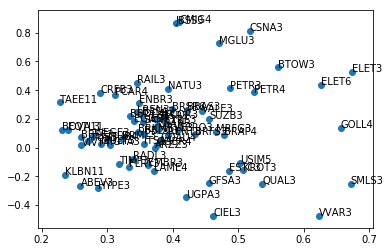

In [18]:
fig, ax = plt.subplots()
ax.scatter(list_desv_pad, list_ret)

for i, txt in enumerate(acoes):
    ax.annotate(txt, (list_desv_pad[i],list_ret[i]))


In [153]:
### algoritimo genetico
from random import random


#inicia as variaveis
class Produto():
    def __init__(self, nome, espaco, valor):
        #nome acao
        self.nome = nome
        #Riscos
        self.espaco = espaco
        #retorno
        self.valor = valor
        
class Individuo():
    #
    def __init__(self, espacos, valores, limite_espacos, geracao=0):
        self.espacos = espacos
        self.valores = valores
        #limite de risco que atribuimos
        self.limite_espacos = limite_espacos
        self.nota_avaliacao = 0
        self.espaco_usado = 0
        self.geracao = geracao
        self.cromossomo = []
        
        #para cada acao que existir ele set 0 ou 1 percorrendo todas as acoes e assim montando um cromossomo para cada portifolio
        
        for i in range(len(espacos)):
            if random() < 0.5:
                self.cromossomo.append("0")
            else:
                self.cromossomo.append("1")
        
                
    def avaliacao(self):
        nota = 0
        soma_espacos = 0
        list_cromo_risco = []  
        list_cromo_retorno = []
        list_cromo_acoes = []
        
        for i in range(len(self.cromossomo)):
             
            if self.cromossomo[i] == '1':
                list_cromo_risco.append(self.espacos[i])
                list_cromo_retorno.append(self.valores[i])
                list_cromo_acoes.append(lista_produtos[i].nome)  
                
               
  
        banco_filtro_2 = banco_filtro.loc[0:252,(list_cromo_acoes)]
        
        
        #matriz corr
        matriz_corr= banco_filtro_2.corr()
        
        
        #matriz de peso
        rando_matriz = np.random.dirichlet(np.ones(len(list_cromo_risco)),size=(1))
        
        #achando a lista ponderado RISCO X PESO
        vol_ponderada = list_cromo_risco * rando_matriz
        
        #achando a lista ponderado retorno X PESO
        retorno_ponderado = list_cromo_retorno*rando_matriz
        print("retorno")
        print(retorno_ponderado)
        
           
        #calculando o risco
        a = matriz_corr.dot(vol_ponderada.transpose())
        b = vol_ponderada.dot(a) 
        #desvio padrão é a raiz da var então var ^1/2 é o desvio padrão
        soma_espacos= b**(1/2)
        
        nota=np.sum(retorno_ponderado)
        
   
        if soma_espacos > self.limite_espacos:
            nota = 1
        self.nota_avaliacao = nota
        self.espaco_usado = soma_espacos
        
     
        
    def crossover(self, outro_individuo):
        #realiza o corte de dois cromossomos para fazer a reprodução
        
        #corte aleatorio        
        corte = round(random()  * len(self.cromossomo))
        
        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]
        
        filhos = [Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
                  Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1)]
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        return filhos
    
    def mutacao(self, taxa_mutacao):
        #print("Antes %s " % self.cromossomo)
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                if self.cromossomo[i] == '1':
                    self.cromossomo[i] = '0'
                else:
                    self.cromossomo[i] = '1'
        #print("Depois %s " % self.cromossomo)
        return self
        
class AlgoritmoGenetico():
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        
    def inicializa_populacao(self, espacos, valores, limite_espacos):        
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(espacos, valores, limite_espacos))
        self.melhor_solucao = self.populacao[0]
        
    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key = lambda populacao: populacao.nota_avaliacao,
                                reverse = True)
        
    def melhor_individuo(self, individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo
            
    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
           soma += individuo.nota_avaliacao
        return soma
    
    def seleciona_pai(self, soma_avaliacao):
        #seleciona os melhores pais
        
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai
    
    def visualiza_geracao(self):
        melhor = self.populacao[0]
        print("G:%s -> Valor: %s Espaço: %s Cromossomo: %s" % (self.populacao[0].geracao,
                                                               melhor.nota_avaliacao,
                                                               melhor.espaco_usado,
                                                               melhor.cromossomo))
    
    def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, limite_espacos):
        #limite = tamanho maximo
        #cria a primeira população
        self.inicializa_populacao(espacos, valores, limite_espacos)
        
        
        for individuo in self.populacao:
            individuo.avaliacao()
        
        self.ordena_populacao()
        
        self.visualiza_geracao()
        
        for geracao in range(numero_geracoes):
            soma_avaliacao = self.soma_avaliacoes()
            nova_populacao = []
            
            for individuos_gerados in range(0, self.tamanho_populacao, 2):
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)
                
                filhos = self.populacao[pai1].crossover(self.populacao[pai2])
                
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
            
            self.populacao = list(nova_populacao)
            
            for individuo in self.populacao:
                individuo.avaliacao()
            
            self.ordena_populacao()
            
            self.visualiza_geracao()
            
            melhor = self.populacao[0]
            self.melhor_individuo(melhor)
        
        print("\nMelhor solução -> G: %s Valor: %s Espaço: %s Cromossomo: %s" %
              (self.melhor_solucao.geracao,
               self.melhor_solucao.nota_avaliacao,
               self.melhor_solucao.espaco_usado,
               self.melhor_solucao.cromossomo))
        
        return self.melhor_solucao.cromossomo,self.melhor_solucao.nota_avaliacao,self.melhor_solucao.espaco_usado

In [154]:
lista_produtos = []
for i, txt in enumerate(acoes):
    resumo_acoes=Produto(txt,list_desv_pad[i],list_ret[i])
    lista_produtos.append(resumo_acoes)

In [155]:
print(lista_produtos)

[<__main__.Produto object at 0x0000021D8FB519B0>, <__main__.Produto object at 0x0000021D8FB592E8>, <__main__.Produto object at 0x0000021D8FFA1F60>, <__main__.Produto object at 0x0000021D8FFA1EF0>, <__main__.Produto object at 0x0000021D900255F8>, <__main__.Produto object at 0x0000021D90025B00>, <__main__.Produto object at 0x0000021D900254A8>, <__main__.Produto object at 0x0000021D8FD11BA8>, <__main__.Produto object at 0x0000021D8FD11B38>, <__main__.Produto object at 0x0000021D9010AD68>, <__main__.Produto object at 0x0000021D9010A630>, <__main__.Produto object at 0x0000021D9010A6D8>, <__main__.Produto object at 0x0000021D9010A898>, <__main__.Produto object at 0x0000021D9010ACC0>, <__main__.Produto object at 0x0000021D9010A8D0>, <__main__.Produto object at 0x0000021D9010A470>, <__main__.Produto object at 0x0000021D9010A9B0>, <__main__.Produto object at 0x0000021D9010A4E0>, <__main__.Produto object at 0x0000021D8FCC54E0>, <__main__.Produto object at 0x0000021D8FCC5080>, <__main__.Produto o

In [156]:
#riscos
espacos = []
#retorno
valores = []
#nome da acao
nomes = []
for produto in lista_produtos:
        espacos.append(produto.espaco)
        print(produto.espaco)        
        valores.append(produto.valor)
        print(produto.valor)
        nomes.append(produto.nome)
        print(produto.nome)

0.2590594513017652
-0.26595744680851063
ABEV3
0.37252794166665804
-0.0026622977677656246
ARZZ3
0.35371332580541426
0.2278233685033217
B3SA3
0.4213887194221363
0.2646750524109015
BBAS3
0.35669973872701854
0.09701492537313434
BBDC3
0.3344840877852691
0.2174213619080539
BBDC4
0.2592623756771502
0.07224185316058107
BBSE3
0.23064965554847425
0.12260442260442247
BOVA11
0.4789081449918537
0.08721905400872183
BRAP4
0.4334732824357175
0.09280138768430185
BRFS3
0.3461522151629991
0.10920963746903854
BRKM5
0.32205080669855257
0.0625000000000001
BRML3
0.39944885154664517
0.2667375132837407
BRSR6
0.5611263087841643
0.5595959595959596
BTOW3
0.4080067908524967
0.12038664323374333
CCRO3
0.46147347133810984
-0.475684740078256
CIEL3
0.4097228653402106
0.8730569948186531
CMIG4
0.28927667837061954
0.3823119777158776
CRFB3
0.37591558722110396
0.14854517611026036
CSAN3
0.517720260381236
0.813953488372093
CSNA3
0.38759398927130906
0.1749077490774907
CYRE3
0.3867164750656098
0.2114427860696519
ECOR3
0.3411692

In [158]:
limite = 3
#para cada reprodução vai gerar quantos filhos?
tamanho_populacao = 100

taxa_mutacao = 0.01
#
numero_geracoes = 10
#inicializando o objeto atribuindo o tamanho população
ag = AlgoritmoGenetico(tamanho_populacao)

while taxa_mutacao <=1:
    resultado,retorno,risco = ag.resolver(taxa_mutacao, numero_geracoes, espacos, valores, limite)
    for i in range(len(lista_produtos)):
        if resultado[i] == '1':
            print("Nome: %s R$ %s " % (lista_produtos[i].nome,lista_produtos[i].valor))
    bests_results = bests_results.append(pd.Series([taxa_mutacao, retorno,risco], index=bests_results.columns ), ignore_index=True)        
    taxa_mutacao =  taxa_mutacao + 0.05       
    

TypeError: resolver() missing 1 required positional argument: 'limite_espacos'

In [136]:
print(bests_results)
variando_mutacao = bests_results

    Mutacao   Retorno                    Risco
0      0.01  0.411622   [[0.3225120064644135]]
1      0.06  0.377743   [[0.2969759460722163]]
2      0.11  0.430782  [[0.31046282311617607]]
3      0.16  0.339970  [[0.25897230777884545]]
4      0.21  0.336610  [[0.31359638243723437]]
5      0.26  0.363766  [[0.34948801409149244]]
6      0.31  0.329773  [[0.30767193216504957]]
7      0.36  0.360275    [[0.322531011341283]]
8      0.41  0.325400  [[0.26451733245693204]]
9      0.46  0.356197   [[0.3344148599433065]]
10     0.51  0.358762  [[0.38185092400151927]]
11     0.56  0.325694  [[0.31106270655118196]]
12     0.61  0.367103    [[0.339200102426497]]
13     0.66  0.300311  [[0.23404239391684956]]
14     0.71  0.323051   [[0.2745653517298529]]
15     0.76  0.373452  [[0.33031137896050194]]
16     0.81  0.338101   [[0.2570265301518687]]
17     0.86  0.387446   [[0.2825621838934736]]
18     0.91  0.291012   [[0.2544431040129967]]
19     0.96  0.357841   [[0.3322940922830321]]


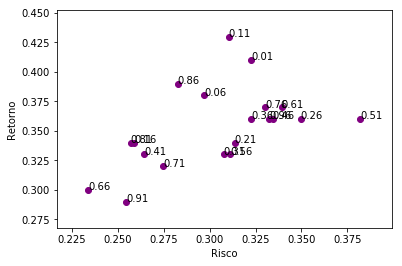

In [172]:
#plotando retornoXrisco por taxa de mutação com o paramentro de corte de risco fixo

variando_mutacao = variando_mutacao.round(2)
list_risco_muta = variando_mutacao['Risco'].values.tolist()
list_ret_muta = variando_mutacao['Retorno'].values.tolist()
list_muta=variando_mutacao['Mutacao'].values.tolist()


#print(list_muta)
fig, ax = plt.subplots()
ax.scatter(variando_mutacao['Risco'], variando_mutacao['Retorno'],color='purple')


plt.xlabel('Risco')
plt.ylabel('Retorno')


for i, txt in enumerate(list_muta):
    ax.annotate(txt, (list_risco_muta[i],list_ret_muta[i]))

In [141]:
#aqui pode-se analisar que a melhor taxa de mutação levando em consideração um corte no risco e o melhor retorno é a 0.11, 
#e se fossemos levar em consideração o menor risco escolheriamos a linha 13 com 0.66 de mutacao
print(variando_mutacao)
print(variando_mutacao.loc[variando_mutacao['Retorno'].idxmax()])
print(variando_mutacao['Risco'].min())

    Mutacao   Retorno                    Risco
0      0.01  0.411622   [[0.3225120064644135]]
1      0.06  0.377743   [[0.2969759460722163]]
2      0.11  0.430782  [[0.31046282311617607]]
3      0.16  0.339970  [[0.25897230777884545]]
4      0.21  0.336610  [[0.31359638243723437]]
5      0.26  0.363766  [[0.34948801409149244]]
6      0.31  0.329773  [[0.30767193216504957]]
7      0.36  0.360275    [[0.322531011341283]]
8      0.41  0.325400  [[0.26451733245693204]]
9      0.46  0.356197   [[0.3344148599433065]]
10     0.51  0.358762  [[0.38185092400151927]]
11     0.56  0.325694  [[0.31106270655118196]]
12     0.61  0.367103    [[0.339200102426497]]
13     0.66  0.300311  [[0.23404239391684956]]
14     0.71  0.323051   [[0.2745653517298529]]
15     0.76  0.373452  [[0.33031137896050194]]
16     0.81  0.338101   [[0.2570265301518687]]
17     0.86  0.387446   [[0.2825621838934736]]
18     0.91  0.291012   [[0.2544431040129967]]
19     0.96  0.357841   [[0.3322940922830321]]
Mutacao      

In [162]:
print(variando_mutacao)

    Mutacao  Retorno                    Risco
0      0.01     0.41   [[0.3225120064644135]]
1      0.06     0.38   [[0.2969759460722163]]
2      0.11     0.43  [[0.31046282311617607]]
3      0.16     0.34  [[0.25897230777884545]]
4      0.21     0.34  [[0.31359638243723437]]
5      0.26     0.36  [[0.34948801409149244]]
6      0.31     0.33  [[0.30767193216504957]]
7      0.36     0.36    [[0.322531011341283]]
8      0.41     0.33  [[0.26451733245693204]]
9      0.46     0.36   [[0.3344148599433065]]
10     0.51     0.36  [[0.38185092400151927]]
11     0.56     0.33  [[0.31106270655118196]]
12     0.61     0.37    [[0.339200102426497]]
13     0.66     0.30  [[0.23404239391684956]]
14     0.71     0.32   [[0.2745653517298529]]
15     0.76     0.37  [[0.33031137896050194]]
16     0.81     0.34   [[0.2570265301518687]]
17     0.86     0.39   [[0.2825621838934736]]
18     0.91     0.29   [[0.2544431040129967]]
19     0.96     0.36   [[0.3322940922830321]]
